# Bachelortron: Predicting performance of Bachelor and Bachelorette contestants from contestant data

In [2]:
import numpy as np 
import pandas as pd

In [3]:
"""
data = pd.read_csv('historical_bachelor_contestants.csv')
"""

"\ndata = pd.read_csv('historical_bachelor_contestants.csv')\n"

In [4]:
# Clean up data
"""
data = data.rename(columns={'Unnamed: 0': 'id'})
data['Name'] = data['Name'].str.split('[').str[0]    # remove references at end
data = data.set_index('id')
data[data.Season == 20].head(50)
"""

"\ndata = data.rename(columns={'Unnamed: 0': 'id'})\ndata['Name'] = data['Name'].str.split('[').str[0]    # remove references at end\ndata = data.set_index('id')\ndata[data.Season == 20].head(50)\n"

In [5]:
#data[data.Season == 19].head(30)

In [6]:
#data.Season.value_counts()

In [7]:
data = pd.read_csv('reddit_bachelor_data.csv')

In [8]:
data['Bachelor_Hometown'].value_counts()

Austin, Texas                55
Arlington, Iowa              30
Milan, Italy                 27
Miami, Florida               27
McKinney, Texas              26
Toronto, Ontario             25
Lancaster, Pennsylvania      25
Dallas, Texas                25
Butler, Missouri             25
London, England              25
Sonoma, California           25
Cleveland, Ohio              25
Charlottesville, Virginia    25
Name: Bachelor_Hometown, dtype: int64

In [9]:
hometown_latitude =

SyntaxError: invalid syntax (<ipython-input-9-152f0c73ff59>, line 1)

In [30]:
data['Hometown'].value_counts()[-50:]

Cache, Oklahoma             1
Santa Rosa, California      1
Las Vegas, Nevada           1
Indianapolis, Indiana[g]    1
Westport, Connecticut       1
Marshall, Missouri          1
Gurnee, Illinois            1
Italy                       1
Fort Smith, Arkansas        1
Oakville, Ontario           1
Phillipsburg, New Jersey    1
Forty Fort, Pennsylvania    1
Tampa, FL                   1
Aurora, Colorado            1
Leduc, Alberta[c]           1
Eastchester, New York       1
Richmond, VA                1
Brookfield, Wisconsin       1
St. Charles, Illinois       1
Terra Haute, Indiana        1
Palos Hills, Illinois       1
Oklahoma City, Oklahoma     1
West Chester, Ohio          1
Leawood, Kansas             1
Temecula, California        1
Salyersville, Kentucky      1
Troutdale, Oregon           1
Culpeper, Virginia          1
Galloway, Ohio              1
Wichita, Kansas             1
Union, Kentucky             1
Southfield, Michigan        1
Norman, Oklahoma            1
Holland, P

In [11]:
stuff = data.loc[:, ['Age', 'Eliminated', 'Season']]
stuff['Eliminated'].value_counts()

Week 1           132
Week 2            52
Week 3            44
Week 4            37
Week 5            24
Week 6            21
Week 7            17
Winner            13
Week 8             8
Runner-up          8
Week 9             5
Week 2 (Quit)      2
Runner-Up          2
Name: Eliminated, dtype: int64

In [12]:
stuff[stuff['Season'] == 2]

,Age,Eliminated,Season
25,27,Winner,2
26,22,Runner-Up,2
27,31,Week 6,2
28,27,Week 5,2
29,28,Week 4,2
30,30,Week 4,2
31,23,Week 3,2
32,24,Week 3,2
33,22,Week 3,2
34,26,Week 3,2


In [13]:
# preprocess Eliminated column
for season in stuff['Season'].unique():
    in_season = stuff[stuff['Season'] == season]
    week_number = in_season['Eliminated'].str.replace(' \(Quit\)', '').str.split(' ').str[-1]
    max_week = week_number[week_number.str.isnumeric()].max()
    week_number = week_number.replace({
        'Winner': str(int(max_week)+2),
        'Runner-Up': str(int(max_week)+1),
        'Runner-up': str(int(max_week)+1)
    }).astype(int)
    #print(week_number)
    #%%
    stuff['Eliminated'][stuff['Season'] == season] = week_number
    print(stuff[stuff['Season'] == season]['Eliminated'].head(5))



0    7
1    6
2    5
3    4
4    3
Name: Eliminated, dtype: object
25    8
26    7
27    6
28    5
29    4
Name: Eliminated, dtype: object
50    9
51    7
52    6
53    5
54    4
Name: Eliminated, dtype: object
75    9
76    7
77    6
78    5
79    4
Name: Eliminated, dtype: object
102    10
103     8
104     7
105     6
106     5
Name: Eliminated, dtype: object
127    8
128    8
129    7
130    6
131    5
Name: Eliminated, dtype: object
152    9
153    8
154    7
155    6
156    5
Name: Eliminated, dtype: object
177    9
178    8
179    7
180    6
181    5
Name: Eliminated, dtype: object
202    9
203    8
204    7
205    6
206    5
Name: Eliminated, dtype: object
227    11
228    10
229     9
230     8
231     7
Name: Eliminated, dtype: object
257    11
258    10
259     9
260     8
261     7
Name: Eliminated, dtype: object
282    11
283    10
284     9
285     8
286     7
Name: Eliminated, dtype: object
308    11
309    10
310     9
311     8
312     7
Name: Eliminated, dtype: object

In [14]:
stuff.head(10)

,Age,Eliminated,Season
0,23,7,1
1,29,6,1
2,24,5,1
3,24,4,1
4,22,3,1
5,28,3,1
6,23,3,1
7,28,3,1
8,27,2,1
9,28,2,1


In [15]:
stuff['Age'] = stuff['Age'].replace({'22[1]': 22, '25[2]': 25})
stuff['Age'].value_counts()

25    60
26    50
24    49
27    45
28    33
23    29
29    28
30    20
22    14
33    10
31     9
32     7
34     3
21     2
35     2
25     1
22     1
36     1
Name: Age, dtype: int64

In [16]:
x = np.expand_dims(stuff['Age'].astype(float).values, axis=1)
y = stuff['Eliminated'].astype(float)
q = stuff['Season'].value_counts().sort_index().astype(float).values

(365,)

In [17]:
import lightgbm as lgb
gbm = lgb.LGBMRanker()
gbm.fit(x, y, group=q, verbose=True)

LGBMRanker(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           importance_type='split', learning_rate=0.1, max_depth=-1,
           min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
           n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
           random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
from scipy.stats import spearmanr
preds_train = gbm.predict(x)
print(preds_train)
spearmanr(y, preds_train)

[ 0.04118599 -0.45631349 -0.58526411 -0.58526411  0.60195109 -0.882311
  0.04118599 -0.882311   -0.54642588 -0.882311   -0.19894764 -0.54642588
  0.04118599 -0.19894764 -0.54642588 -0.45631349 -1.16484305 -1.16484305
  0.60195109 -1.16484305 -0.54642588 -0.45631349 -0.58526411 -0.45631349
  0.15073442 -0.54642588  0.60195109 -1.16484305 -0.54642588 -0.882311
 -1.16484305  0.04118599 -0.58526411  0.60195109  0.15073442 -0.58526411
 -0.19894764 -0.96780289 -1.16484305 -0.54642588  0.15073442 -0.45631349
 -0.45631349 -0.58526411 -0.58526411  0.60195109 -1.16484305  0.15073442
 -0.882311   -0.882311    0.60195109  0.04118599  0.15073442 -0.882311
  0.04118599 -0.882311   -0.19894764 -0.58526411  0.15073442  0.60195109
  0.15073442 -0.54642588 -0.54642588 -0.54642588 -0.19894764 -0.19894764
 -0.58526411 -0.58526411  0.15073442 -0.19894764 -0.19894764  0.60195109
  0.15073442  0.15073442 -0.19894764 -0.58526411  0.04118599 -0.19894764
 -0.58526411  0.04118599  0.60195109 -0.54642588 -0.88231

SpearmanrResult(correlation=0.13221192890484887, pvalue=0.01146001658243384)

In [19]:
import matplotlib.pyplot as plt
for season in stuff['Season'].unique():
    in_range = stuff['Season'] == season
    plt.figure()
    plt.scatter(y[in_range], preds_train[in_range])
    plt.title(season)

<Figure size 432x288 with 0 Axes>

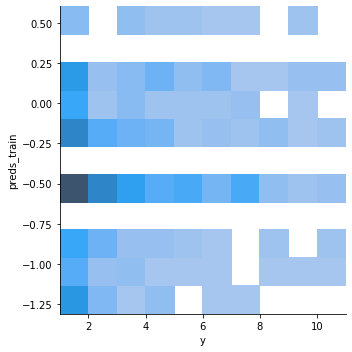

In [20]:
import seaborn as sns
result = pd.DataFrame({'y': y, 'preds_train': preds_train})
plt.figure()
sns.displot(result, x='y', y='preds_train')

In [21]:
import itertools
# pair transform


In [22]:
stuff.columns

Index(['Age', 'Eliminated', 'Season'], dtype='object')

In [23]:
data.columns

Index(['Name', 'Age', 'Hometown', 'Job', 'Eliminated', 'Season', 'Bachelor',
       'Bachelor Age', 'Bachelor_Hometown'],
      dtype='object')

In [27]:
data['Hometown'].value_counts()[:50]

Chicago, Illinois                    6
Dallas, Texas                        6
Seattle, Washington                  5
Los Angeles, California              5
Houston, Texas                       4
Tampa, Florida                       4
Scottsdale, Arizona                  4
Pittsburgh, Pennsylvania             4
Salt Lake City, Utah                 3
San Diego, California                3
Beverly Hills, California            3
New York, New York                   3
Tempe, Arizona                       3
San Francisco, California            3
Boise, Idaho                         3
Miami, Florida                       3
Chapel Hill, North Carolina          2
Richmond, Virginia                   2
Columbus, Ohio                       2
Austin, Texas                        2
Plano, Texas                         2
Walnut Creek, California             2
Honolulu, Hawaii                     2
Nashville, Tennessee                 2
Philadelphia, Pennsylvania           2
Stockton, California     